In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [31]:
df = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County_.csv")
df.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [34]:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


df['Year'] = df['Date'].dt.year


yearly_ev_count = df.groupby('Year')['Electric Vehicle (EV) Total'].sum().reset_index()
yearly_ev_count.rename(columns={'Electric Vehicle (EV) Total': 'Electric Vehicle Population'}, inplace=True)

In [35]:
# Convert to numeric (in case it’s stored as string)
df['Electric Vehicle (EV) Total'] = pd.to_numeric(df['Electric Vehicle (EV) Total'], errors='coerce')


In [36]:
# Group by Year and sum total EVs
yearly_ev_count = df.groupby('Year')['Electric Vehicle (EV) Total'].sum().reset_index()
yearly_ev_count.rename(columns={'Electric Vehicle (EV) Total': 'Electric Vehicle Population'}, inplace=True)


In [37]:
# View grouped data
print(yearly_ev_count)


   Year  Electric Vehicle Population
0  2017                      60998.0
1  2018                      62825.0
2  2019                      67614.0
3  2020                      77501.0
4  2021                      98364.0
5  2022                      97745.0
6  2023                     144424.0
7  2024                      26754.0


In [38]:
# Prepare data for model
X = yearly_ev_count[['Year']]
y = yearly_ev_count['Electric Vehicle Population']

# Create and train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example: suppose your model is called `model`, and your features are X
y_pred = model.predict(X)

# Now calculate metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 21743.276785714435
RMSE: 31596.080718961366
R² Score: 0.05503599363814915


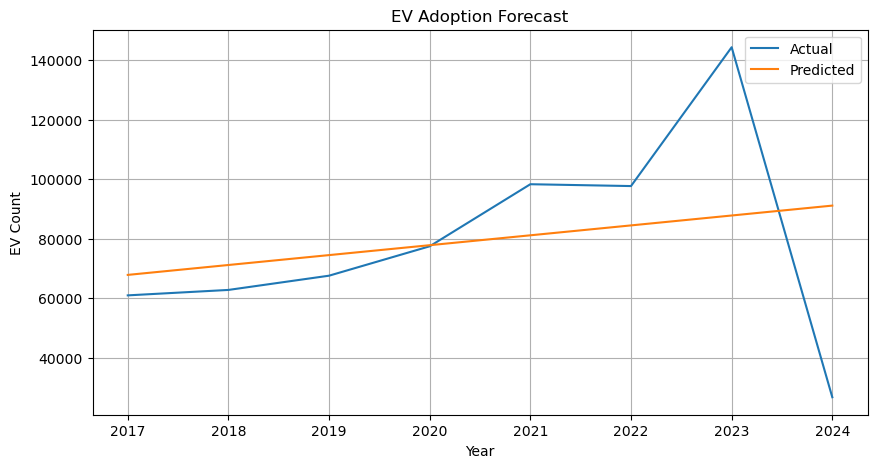

In [41]:
plt.figure(figsize=(10,5))
plt.plot(yearly_ev_count['Year'], y, label='Actual')
plt.plot(yearly_ev_count['Year'], y_pred, label='Predicted')
plt.xlabel("Year")
plt.ylabel("EV Count")
plt.legend()
plt.title("EV Adoption Forecast")
plt.grid(True)
plt.show()


In [42]:
joblib.dump(model, "ev_adoption_model.pkl")


['ev_adoption_model.pkl']